In [29]:
import pandas as pd
import seaborn as srn 
import statistics as sts

In [30]:
#import data
dataset = pd.read_csv("./data/tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [31]:
#explore categorical data
#aparencia
grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

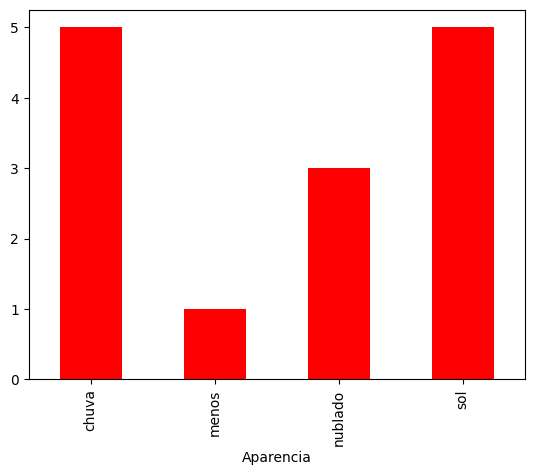

In [32]:
grouped.plot.bar(color="red")

In [33]:
#vento
grouped1 = dataset.groupby(['Vento']).size()
grouped1

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

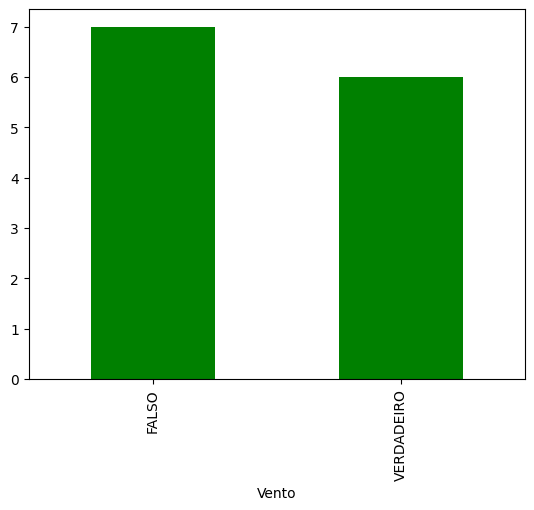

In [34]:
grouped1.plot.bar(color="green")

In [35]:
#jogar
grouped2 = dataset.groupby(['Jogar']).size()
grouped2

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

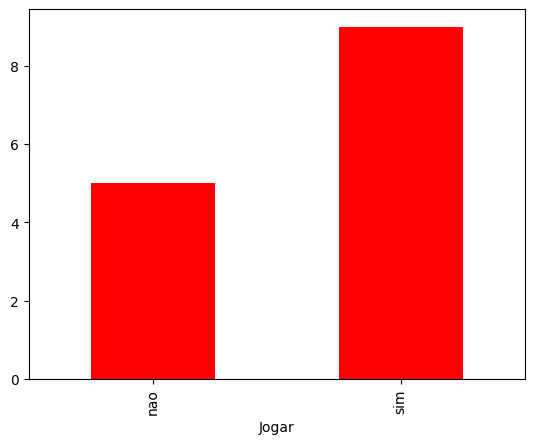

In [36]:
grouped2.plot.bar(color="red")

In [37]:
#explore numerical columns 
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

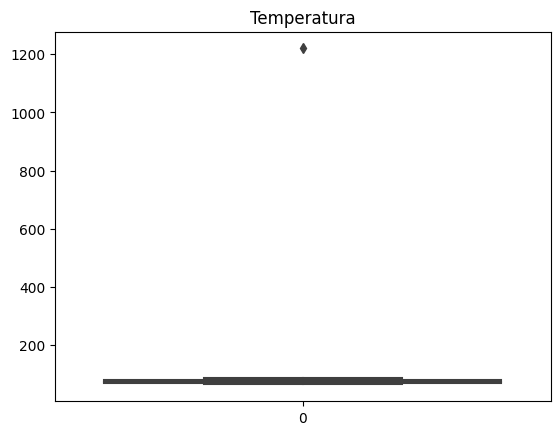

In [38]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


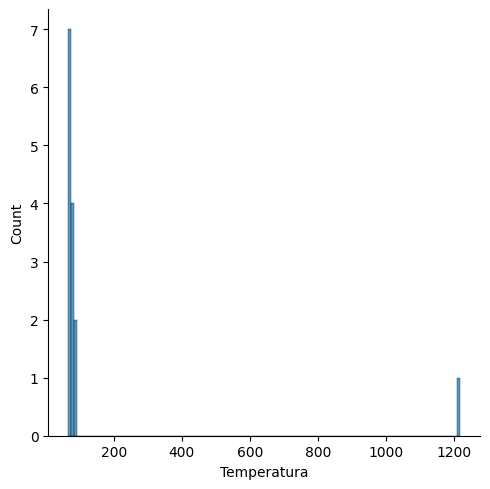

In [42]:
srn.displot(dataset['Temperatura'])

In [43]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

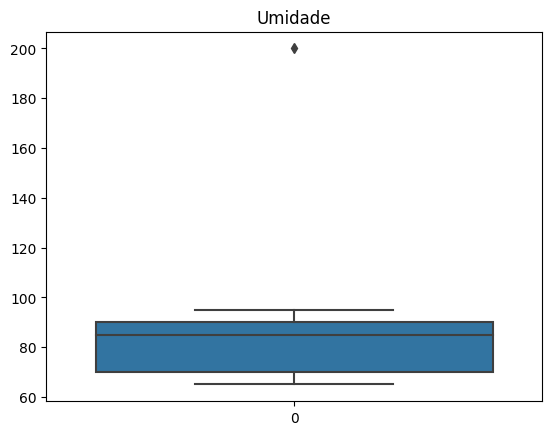

In [47]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


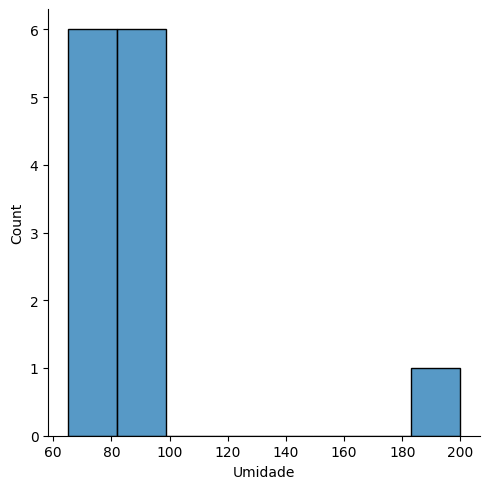

In [49]:
srn.displot(dataset['Umidade'])

In [50]:
#count NA values
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [51]:
#invalid value -> Aparencia
grouped3 = dataset.groupby(['Aparencia']).size()
grouped3

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [57]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "Sol"
#see result
grouped4 = dataset.groupby(['Aparencia']).size()
grouped4

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [59]:
#temperatura out of domain
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [60]:
#visualize
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [61]:
#median
median = sts.median(dataset['Temperatura'])
median

73.5

In [63]:
#replacee
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] =  median

In [66]:
#chek if there's data out of domain
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [68]:
#umidade, domain and NA
grouped5 = dataset.groupby(['Umidade']).size() 
grouped5

Umidade
65.0     1
70.0     3
73.5     1
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
200.0    1
dtype: int64

In [70]:
#total de NAs
dataset['Umidade'].isnull().sum()

1

In [73]:
#median
median2  = sts.median(dataset['Umidade'])
median2

82.5

In [74]:
#fill na 
dataset['Umidade'].fillna(median, inplace =  True)

In [75]:
dataset['Umidade'].isnull().sum()

0

In [76]:
#visualize according to the domain 
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [77]:
#uptade with median
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = median

In [78]:
#visualize again
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade']

Series([], Name: Umidade, dtype: float64)

In [79]:
#Ventos 
grouped6 = dataset.groupby(['Vento']).size()
grouped6

Vento
73.5          1
FALSO         6
VERDADEIRO    6
dtype: int64

In [80]:
#NA sum
dataset['Vento'].isnull().sum()

1

In [81]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace =  True)

In [82]:
#NA sum
dataset['Vento'].isnull().sum()

0

C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperatura', ylabel='Count'>

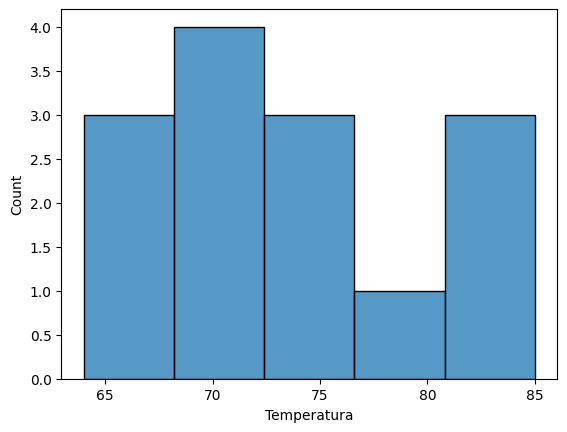

In [91]:
srn.histplot(dataset['Temperatura'])

C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arnal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Umidade', ylabel='Count'>

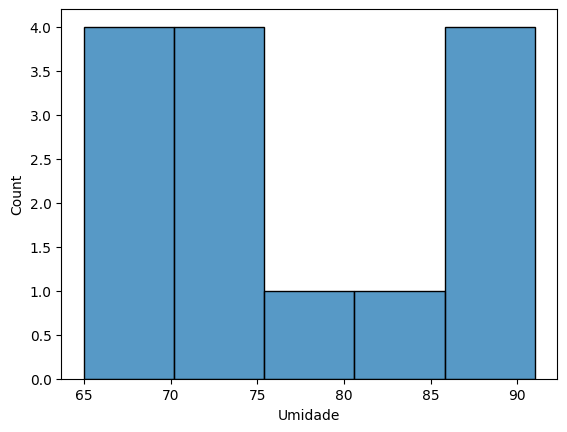

In [94]:
srn.histplot(dataset['Umidade'])